In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
style.use('ggplot')

In [15]:
sys.path.append('../detector')
sys.path.append('../detector/sHDP')

In [6]:
from corpora import Corpora

In [7]:
data_path = '../data/parsed/'

In [8]:
corpus = Corpora(data_path=data_path)
corpus.build()

In [9]:
from pipeline.embeddings import Word2VecWrapper

In [10]:
embedding_model = Word2VecWrapper(dictionary=corpus.dictionary, size=50, normalize='l2', workers=1)
embedding_model.fit(corpus, epochs=50)

In [11]:
words = [v for v in corpus.dictionary.values()]

In [12]:
vector_map = pd.DataFrame(embedding_model.transform(words).T)

In [16]:
from pipeline.topics import SHDPWrapper

In [17]:
%time topic_model = SHDPWrapper(n_topics=40, num_docs=len(corpus)+1, dim=50, vector_map=vector_map)

C:\Users\eemsaa\Documents\GitHub\KeyTopicDetection\detector\sHDP\core\util\stats.py:152: UserWarning: Not sure about sampling vMF, use with caution!!!! 
  warn('Not sure about sampling vMF, use with caution!!!! ')


Wall time: 615 ms


In [18]:
%time topic_model.fit(corpus.bowize())

../detector/sHDP\core\core_distributions.py:184: UserWarning: switching to asymptotic regime for the infinity values !
  warn('switching to asymptotic regime for the infinity values !')
../detector/sHDP\core\core_distributions.py:298: UserWarning: switching to asymptotic  !
  warn( "switching to asymptotic  !")


Wall time: 1min 6s


In [19]:
%time topics = topic_model.transform(corpus.bowize())
topics

Wall time: 17.5 s


array([[0.01243422, 0.05693705, 0.01361783, ..., 0.06346305, 0.0054277 ,
        0.00643855],
       [0.01633208, 0.10225354, 0.01546107, ..., 0.09460001, 0.02894536,
        0.0066527 ],
       [0.01444025, 0.02985586, 0.01487767, ..., 0.05031065, 0.01923558,
        0.00641853],
       ...,
       [0.02347547, 0.0559382 , 0.01381838, ..., 0.05140439, 0.02795677,
        0.0083221 ],
       [0.02009529, 0.03913318, 0.01487224, ..., 0.06121466, 0.00866038,
        0.00654917],
       [0.00756547, 0.05140214, 0.01281454, ..., 0.04281388, 0.01999052,
        0.01046986]])

In [20]:
%time words = topic_model.topic_words(n_words=10)
for t in words:
    print([corpus.dictionary.id2token[i] for i in t])
    print()

Wall time: 6.54 s
['example', 'signal', 'information', 'non', 'images', 'image', 'applied', 'field', 'ii', 'signals']

['abstract', 'university', 'research', 'mit', 'science', 'edu', 'department', 'cambridge', 'report', 'ma']

['neural', 'algorithm', 'networks', 'data', 'function', 'approximation', 'functions', 'parameters', 'network', 'weights']

['xi', 'denotes', 'xl', 'exp', 'ex', 'li', 'il', 'vi', 'ij', 'xj']

['test', 'neural', 'error', 'rate', 'results', 'networks', 'shown', 'training', 'case', 'values']

['algorithm', 'neural', 'networks', 'simple', 'error', 'parameters', 'data', 'shown', 'rate', 'case']

['single', 'variables', 'random', 'structure', 'consider', 'state', 'probability', 'let', 'problem', 'variable']

['note', 'defined', 'assume', 'constant', 'fixed', 'parameter', 'depends', 'according', 'follows', 'true']

['step', 'computed', 'gives', 'compute', 'procedure', 'best', 'solution', 'means', 'finding', 'exact']

['single', 'variables', 'random', 'structure', 'consid

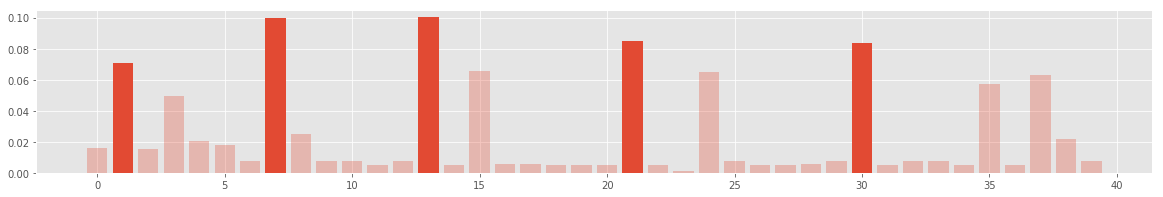

In [24]:
topic_by_doc = topics.sum(axis=0)/len(corpus)
fig, ax = plt.subplots(figsize=(20,3))
ax.bar(range(topic_model.num_states), topic_by_doc, alpha=0.3)
rects = ax.patches
for i in np.argsort(topic_by_doc)[-5:]:
    rects[i].set_alpha(1)